In [54]:
import pandas as pd
import plotly.express as px
from src.utils import dataframe_coeficientes

RANDOM_STATE = 42

In [55]:
df = pd.read_parquet("../dados/diabetes_tratador.parquet")

df

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


Seperar em dados de treino e dados de teste.

In [56]:
X = df.drop(columns='target')

y = df['target']  # que é a coluna que queremos prever

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE)

#ou seja o test size é de 20% da base

In [58]:
X_train.head()

#ou seja o train_test_split retorna um df para os X

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose
17,68,2,27.5,111.0,214,147.0,39.0,5.0,4.9416,91
66,46,2,24.7,85.0,174,123.2,30.0,6.0,4.6444,96
137,50,1,31.0,123.0,178,105.0,48.0,4.0,4.8283,88
245,41,1,23.1,86.0,148,78.0,58.0,3.0,4.0943,60
31,42,1,20.3,71.0,161,81.2,66.0,2.0,4.2341,81


Vamos agora fazer o treinamento do nosso modelo e ver qual nota ele tira


In [59]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
regressor.score(X_train, y_train)

0.5279193863361498

In [61]:
regressor.score(X_test, y_test)

0.4526027629719189

In [62]:
regressor.coef_

# o peso de cada coluna na metrica

array([  0.13768782, -23.06446772,   5.84636265,   1.19709252,
        -1.28168474,   0.81115203,   0.60165319,  10.15953917,
        67.1089624 ,   0.20159907])

In [63]:
regressor.intercept_

#é o valor que o modelo prevê quando todas as variáveis de entrada valem zero

-341.3782363335048

In [64]:
coefs = dataframe_coeficientes(coeficientes=regressor.coef_, colunas=X.columns)

coefs

,coeficiente
sexo,-23.064468
colesterol_total,-1.281685
idade,0.137688
glicose,0.201599
hdl,0.601653
ldl,0.811152
pressao_media,1.197093
imc,5.846363
colesterol_hdl,10.159539
triglicerides,67.108962


In [65]:
fig = px.bar(coefs, template="plotly_dark", orientation='h', labels={"value": "Coeficiente", "index": "Variável"})
fig.show()

## O que significa os coficientes

Muita coisa influencia na predição do modelo, mas uma das coisas que diz o que mais tem influencia é os coficientes, no caso apresentado fica bem claro que no gráfico os `triglicerides` é a coluna que mais influencia no y, no nosso caso no target. Mas isso nem sempre está certo.

As vezes a escala tem muito fator... por exemplo uma coluna vai de 0 até 100 e a outra até 1, esse coluna 0 a 100 pode ter um coeficiente muito maior e mesmo assim ter a mesma importancia da coluna que vai de 0 até 1.



## Metricas do sklearn


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

y_pred = regressor.predict(X_test)

y_pred ##Os valores que o modelo preveu são esses

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [67]:
r2_score(y_test, y_pred) #estou usando o metodo do r2_score para ver as metricas do meu treinamento

0.4526027629719189

In [68]:
mean_absolute_error(y_test, y_pred)

42.79409467959994

In [69]:
mean_squared_error(y_test, y_pred)

2900.193628493484

In [70]:
root_mean_squared_error(y_test, y_pred)

53.85344583676595

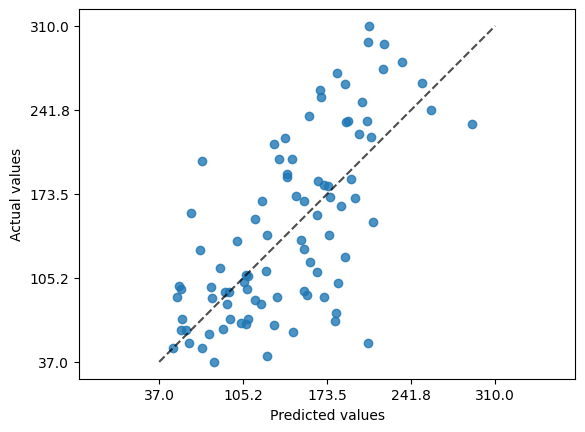

In [74]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred,
    kind='actual_vs_predicted'
)

In [78]:
residuos = y_test - y_pred

fig = px.histogram(residuos, template="plotly_dark", labels={"value": "Resíduo", "probability density": "Densidade"})
fig.show()

### Curva de aprendizado